<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to the Central Limit Theorem

_Authors: Matt Brems (DC), Kiefer Katovich (SF), Elaina Hyde (SYD)_

---

### Lesson Guide
- [Review of Sample Statistics and Parameters](#review-statistics-parameters)
- [The Normal Distribution](#normal-distribution)
- [The 68-95-99.7 Rule](#zdist-rule)
- [The Central Limit Theorem](#central-limit-theorem)
- [Visualizing the CLT](#visualizing-clt)
- [Additional Resources](#additional-resources)


In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='review-statistics-parameters'></a>

### Review: sample statistics and parameters

---

Recall that we use sample statistics to estimate population parameters. Our goal is to calculate sample statistics and then rely on properties of a random sample (and perhaps additional assumptions) to make inferences that we can generalize to the larger population of interest.

Below is a table comparing some example sample statistics and population parameters:

Metric  | Statistic  | Parameter 
-------- | ---------- | -------- 
mean   | $$\bar{x} = \frac{\sum x}{n}$$ | $$ \mu = \frac{\sum x}{N} $$      
standard deviation   | $$ s = \sqrt{\frac{\sum_i (x_i - \bar{x})^2}{n-1}} $$ | $$ \sigma = \sqrt{\frac{\sum_i (x_i - \mu)^2}{N} } $$
correlation   | $$ r = \frac{\hat{Cov}(X, Y)}{s_X s_Y} $$ | $$ \rho = \frac{Cov(X, Y)}{\sigma_X \sigma_Y} $$

<a id='normal-distribution'></a>

### The Normal distribution

---

The normal distribution relies on two parameters: 
- The population mean
- The population standard deviation. 

If a variable follows a Normal distribution exactly, its mean, median, and mode will all be equal.

**Example: Intelligence Quotient**

Intelligence Quotient (IQ) follows a Normal distribution by design. IQ is Normally distributed with a mean of 100 and a standard deviation of 15. You might see this specified like:
- IQ ~ Normal(100,15) 
- or IQ ~ N(100,15)

**We can plot the normal distribution N(100, 15) using `scipy`.**

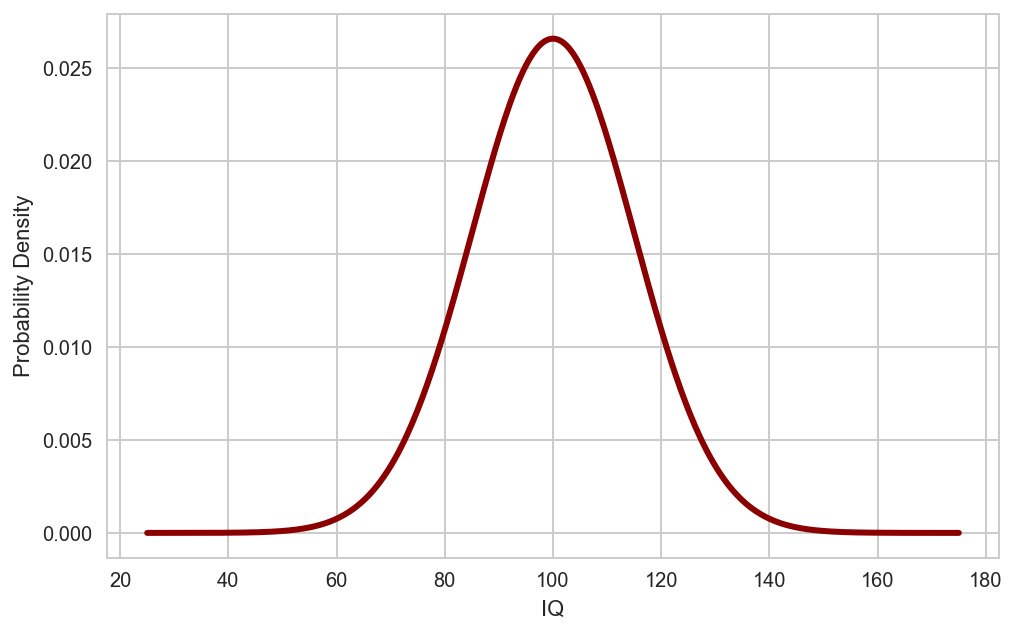

In [4]:
mu = 100
sigma = 15
std =15

xpoints = np.linspace(mu - 5*std, mu + 5*std, 500)
ypoints = stats.norm.pdf(xpoints, mu, std)


fig, ax = plt.subplots(figsize=(8,5))
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')
plt.xlabel('IQ')
plt.ylabel('Probability Density')

**Below is a visual representation of the 68-95-99.7 rule on the IQ distribution:**

Recall that...

- 68% of observations from a population will fall within $\pm 1$ standard deviation of the population mean.
- 95% of observations from a population will fall within $\pm 2$ standard deviations of the population mean.
- 99.7% of observations from a population will fall within $\pm 3$ standard deviations of the population mean.

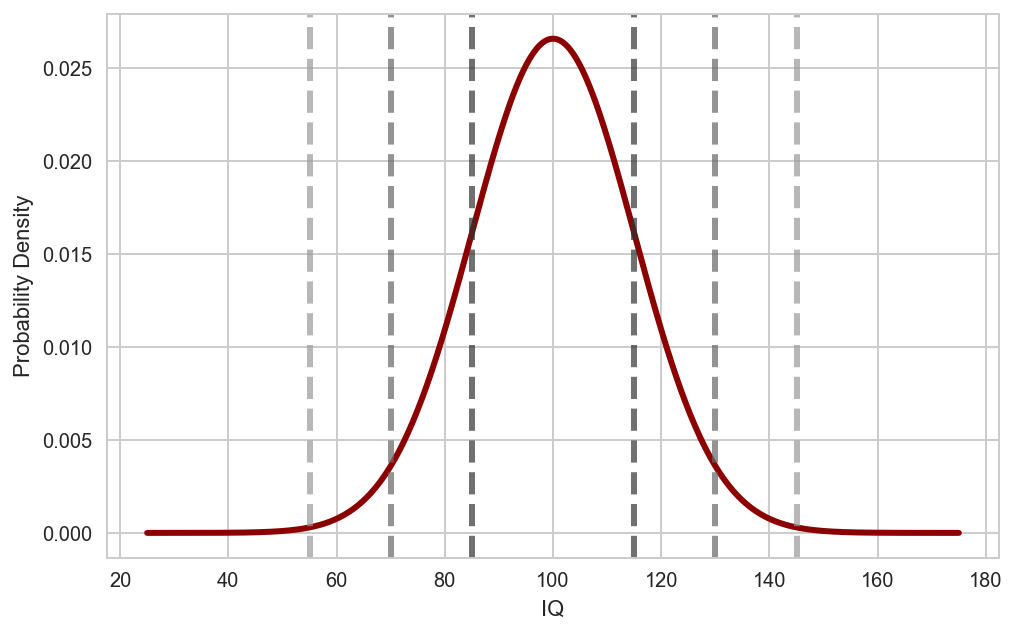

In [5]:
mu = 100
sigma = 15

xpoints = np.linspace(mu - 5*sigma, mu + 5*sigma, 500)
ypoints = stats.norm.pdf(xpoints, mu, sigma)


fig, ax = plt.subplots(figsize=(8,5))
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# 68%:
ax.axvline(mu-sigma, ls='dashed', lw=3, color='#333333', alpha=0.7)
ax.axvline(mu+sigma, ls='dashed', lw=3, color='#333333', alpha=0.7)

# 95%
ax.axvline(mu-2*sigma, ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(mu+2*sigma, ls='dashed', lw=3, color='#666666', alpha=0.7)

# 99.7%
ax.axvline(mu-3*sigma, ls='dashed', lw=3, color='#999999', alpha=0.7)
ax.axvline(mu+3*sigma, ls='dashed', lw=3, color='#999999', alpha=0.7)


plt.xlabel('IQ')
plt.ylabel('Probability Density')

<a id='visualizing-clt'></a>

### Visualizing the CLT: athlete salary data

---

Below is the path to a `.csv` with a variety of data on today's highest paid athletes. Many of the variables measured in the data set are far from normally distributed. We will show that, despite this fact, the distribution of sample means for these variables will be asymptotically normally distributed, as proven by the CLT.

> **NOTE:** The code below uses the pandas package to load the data into a pandas DataFrame and extract the salary information. If this is unfamiliar, you can safely ignore this part of the code for now.

**We will  now load in the salary data for athletes and extract the total pay information as a variable.**

In [7]:
athletes_csv = './datasets/Athletes.csv'

import pandas as pd
ath = pd.read_csv(athletes_csv)
salary = ath['Total Pay'].values.tolist()

**The list of salary information currently contains strings. Clean the salary list and convert these into floats.**

In [8]:
print(salary)

['$22,000,000', '$17,700,000', '$21,500,000', '$22,900,000', '$18,050,000', '$26,700,000', '$20,400,000', '$23,000,000', '$18,435,000', '$17,500,000', '$20,500,000', '$18,750,000', '$29,400,000', '$24,200,000', '$24,200,000', '$21,800,000', '$25,300,000', '$20,700,000', '$23,800,000', '$19,800,000', '$24,300,000', '$20,000,000', '$36,600,000', '$23,200,000', '$24,450,000', '$21,000,000', '$25,500,000', '$29,900,000', '$61,200,000', '$21,000,000', '$41,800,000', '$20,300,000', '$31,000,000', '$21,300,000', '$105,000,000', '$18,300,000', '$36,400,000', '$22,350,000', '$21,700,000', '$21,200,000', '$18,000,000', '$20,750,000', '$17,500,000', '$18,700,000', '$23,500,000', '$22,500,000', '$22,900,000', '$33,000,000', '$20,300,000', '$24,600,000', '$24,800,000', '$21,350,000', '$20,800,000', '$20,700,000', '$31,900,000', '$61,500,000', '$18,500,000', '$72,300,000', '$32,000,000', '$23,600,000', '$64,700,000', '$17,300,000', '$30,000,000', '$24,400,000', '$22,700,000', '$22,600,000', '$43,800

In [1]:
# Clean the data - convert to float

In [10]:
print(salary[0:10])

['$22,000,000', '$17,700,000', '$21,500,000', '$22,900,000', '$18,050,000', '$26,700,000', '$20,400,000', '$23,000,000', '$18,435,000', '$17,500,000']


In [12]:
salary=[float(x.replace(',','').replace('$','')) for x in salary]

AttributeError: 'float' object has no attribute 'replace'

In [13]:
salary

[22000000.0,
 17700000.0,
 21500000.0,
 22900000.0,
 18050000.0,
 26700000.0,
 20400000.0,
 23000000.0,
 18435000.0,
 17500000.0,
 20500000.0,
 18750000.0,
 29400000.0,
 24200000.0,
 24200000.0,
 21800000.0,
 25300000.0,
 20700000.0,
 23800000.0,
 19800000.0,
 24300000.0,
 20000000.0,
 36600000.0,
 23200000.0,
 24450000.0,
 21000000.0,
 25500000.0,
 29900000.0,
 61200000.0,
 21000000.0,
 41800000.0,
 20300000.0,
 31000000.0,
 21300000.0,
 105000000.0,
 18300000.0,
 36400000.0,
 22350000.0,
 21700000.0,
 21200000.0,
 18000000.0,
 20750000.0,
 17500000.0,
 18700000.0,
 23500000.0,
 22500000.0,
 22900000.0,
 33000000.0,
 20300000.0,
 24600000.0,
 24800000.0,
 21350000.0,
 20800000.0,
 20700000.0,
 31900000.0,
 61500000.0,
 18500000.0,
 72300000.0,
 32000000.0,
 23600000.0,
 64700000.0,
 17300000.0,
 30000000.0,
 24400000.0,
 22700000.0,
 22600000.0,
 43800000.0,
 20400000.0,
 17400000.0,
 18500000.0,
 33600000.0,
 33100000.0,
 21800000.0,
 27100000.0,
 53200000.0,
 23900000.0,
 35400000.0

(array([ 73.,  12.,   5.,   2.,   2.,   3.,   1.,   1.,   0.,   1.]),
 array([  1.73000000e+07,   2.60700000e+07,   3.48400000e+07,
          4.36100000e+07,   5.23800000e+07,   6.11500000e+07,
          6.99200000e+07,   7.86900000e+07,   8.74600000e+07,
          9.62300000e+07,   1.05000000e+08]),
 <a list of 10 Patch objects>)

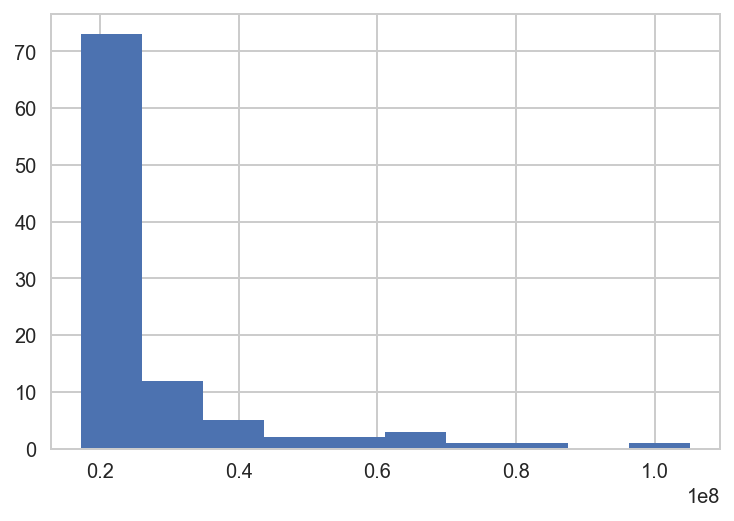

In [15]:
plt.hist(salary)

**Below is a function that will plot a distribution (as a list of numbers). Plot the salary information using this function.**

Is the salary for these athletes normally distributed?

In [10]:
def dist_plotter(sample):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.distplot(sample, bins=50, kde=False)
    plt.show()

**Write a function that will take a random sample of size $n=30$ from this salary list 1000 times, calculate the means of the samples, and return the sample means as a new list.**

*Hint: you can use `numpy`'s `np.random.choice` to perform your sampling.*

In [17]:
# Write the sample mean function:
def sampler(population, n=30, k=1000):
    sample_means=[]
    for i in range(k):
        sample=np.random.choice(population,size=n, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

2611916.44473


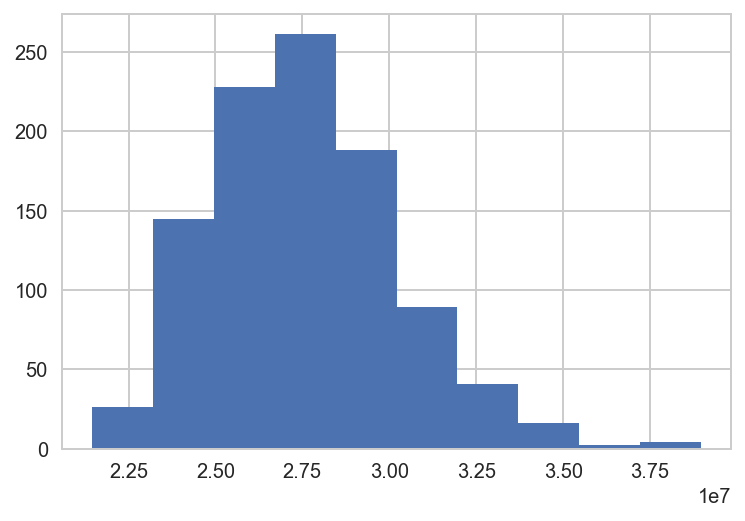

In [21]:
n=30
means=sampler(salary,k=1000)
plt.hist(means)

std_err=np.std(salary)/np.sqrt(n)
print(std_err)

**Plot the sample means using the distribution plotter function.**

Is the distribution of sample means approximately normally distributed? What happens if you increase the number of sample means to 10,000? 100,000?

<a id='additional-resources'></a>

### Additional resources

---

http://blog.vctr.me/posts/central-limit-theorem.html

http://www.usablestats.com/lessons/central_limit

http://blog.minitab.com/blog/michelle-paret/explaining-the-central-limit-theorem-with-bunnies-and-dragons-v2
